In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])
df.dropna(inplace=True)
print(df.shape)
print(df.head())


(714, 3)
   Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500


In [2]:
X = df.iloc[:, 1:3]
y = df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.head())
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy')))


      Age     Fare
328  31.0  20.5250
73   26.0  14.4542
253  30.0  16.1000
719  33.0   7.7750
666  25.0  13.0000
0.6293706293706294
0.6317097026604068


In [3]:
X = df.iloc[:, 1:3]
y = df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.head())
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy')))

      Age     Fare
328  31.0  20.5250
73   26.0  14.4542
253  30.0  16.1000
719  33.0   7.7750
666  25.0  13.0000
0.6223776223776224
0.6288928012519561


In [4]:
kbin_age = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
trf = ColumnTransformer([
    ('first', kbin_age, [0]),
    ('second', kbin_fare, [1])
])
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)
print(X_train_trf.shape)
print(X_train_trf[:5])
print(trf.named_transformers_['first'].bin_edges_)
print(trf.named_transformers_['second'].bin_edges_)
output = pd.DataFrame({'age_trf':X_train_trf[:,0], 'fare_trf':X_train_trf[:,1]})
print(output.sample(5))
X_train_trf_df = pd.DataFrame(X_train_trf, columns=['age_bins', 'fare_bins'])
output_age_labels = pd.cut(X_train['Age'], bins=trf.named_transformers_['first'].bin_edges_[0].tolist(), labels=range(10), include_lowest=True)
output_fare_labels = pd.cut(X_train['Fare'], bins=trf.named_transformers_['second'].bin_edges_[0].tolist(), labels=range(10), include_lowest=True)
output = pd.DataFrame({'age': X_train['Age'], 'age_trf': X_train_trf[:, 0], 'age_labels': output_age_labels,
                       'fare': X_train['Fare'], 'fare_trf': X_train_trf[:, 1], 'fare_labels': output_fare_labels})
print(output.sample(5))


(571, 2)
[[5. 5.]
 [4. 4.]
 [5. 5.]
 [6. 1.]
 [4. 4.]]
[array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
        50.  , 80.  ])                                                ]
[array([  0.    ,   7.75  ,   7.8958,   9.225 ,  13.    ,  15.75  ,
         26.    ,  29.125 ,  51.4792,  82.1708, 512.3292])         ]
     age_trf  fare_trf
189      2.0       2.0
204      7.0       7.0
345      9.0       0.0
487      9.0       4.0
271      2.0       2.0
      age  age_trf age_labels     fare  fare_trf fare_labels
309  30.0      5.0          5  56.9292       8.0           8
857  51.0      9.0          9  26.5500       6.0           6
12   20.0      2.0          2   8.0500       2.0           2
161  40.0      7.0          7  15.7500       5.0           4
441  20.0      2.0          2   9.5000       3.0           3


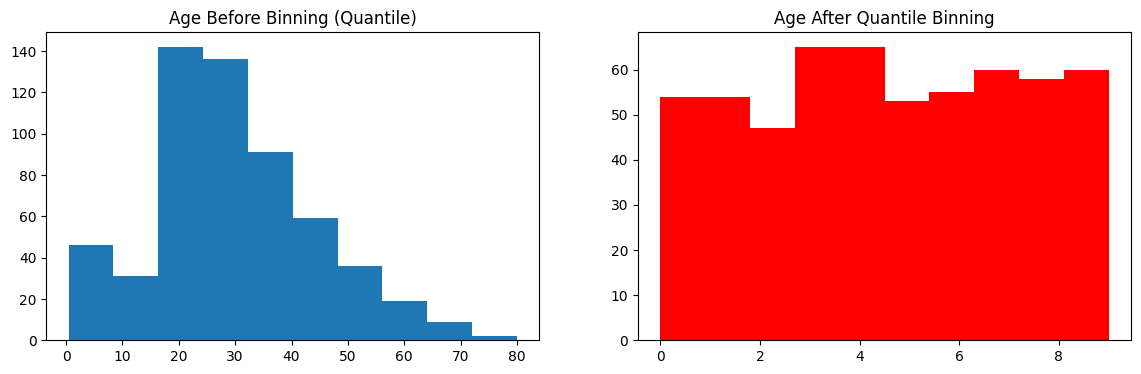

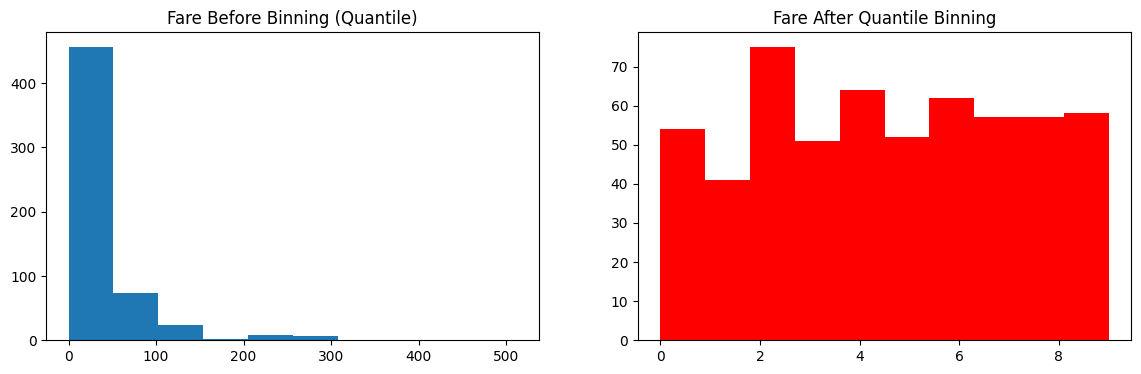

0.6223776223776224
0.6777979431336962


In [5]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
plt.hist(X_train['Age'])
plt.title('Age Before Binning (Quantile)')

plt.subplot(122)
plt.hist(X_train_trf[:, 0], color='red')
plt.title('Age After Quantile Binning')
plt.show()

plt.figure(figsize=(14, 4))
plt.subplot(121)
plt.hist(X_train['Fare'])
plt.title('Fare Before Binning (Quantile)')

plt.subplot(122)
plt.hist(X_train_trf[:, 1], color='red')
plt.title('Fare After Quantile Binning')
plt.show()
clf_trf = DecisionTreeClassifier()
clf_trf.fit(X_train_trf, y_train)
y_pred_trf = clf_trf.predict(X_test_trf)
print(accuracy_score(y_test, y_pred_trf))
print(np.mean(cross_val_score(DecisionTreeClassifier(), X_train_trf, y_train, cv=10, scoring='accuracy')))


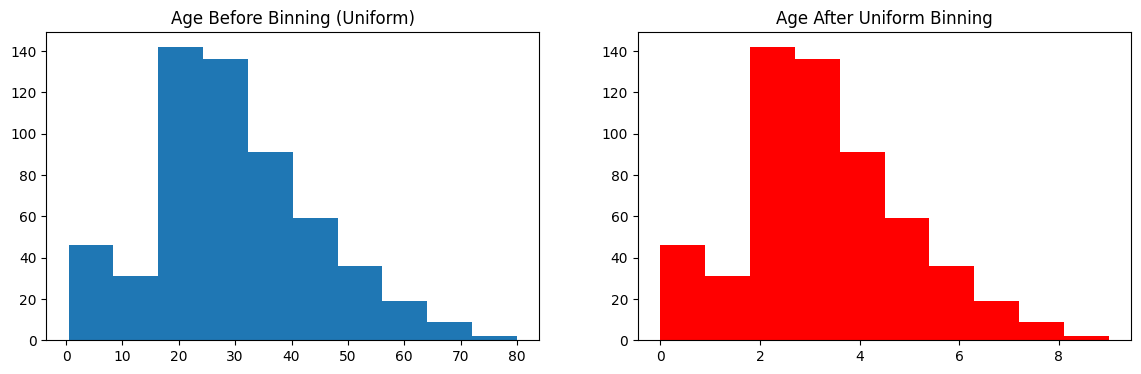

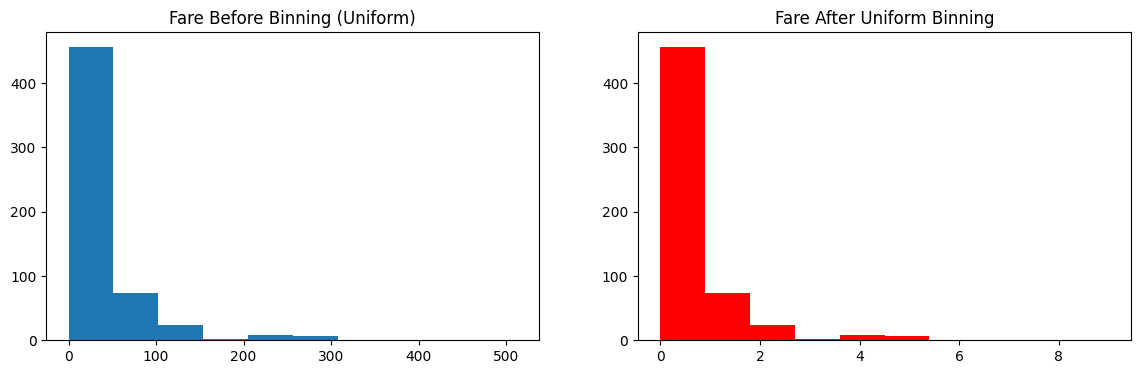

0.6783216783216783
0.682940108892922


In [6]:
kbin_age_uniform = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
kbin_fare_uniform = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
trf_uniform = ColumnTransformer([
    ('first', kbin_age_uniform, [0]),
    ('second', kbin_fare_uniform, [1])
])
X_train_trf_uniform = trf_uniform.fit_transform(X_train)
X_test_trf_uniform = trf_uniform.transform(X_test)
plt.figure(figsize=(14, 4))
plt.subplot(121)
plt.hist(X_train['Age'])
plt.title('Age Before Binning (Uniform)')

plt.subplot(122)
plt.hist(X_train_trf_uniform[:, 0], color='red')
plt.title('Age After Uniform Binning')
plt.show()

plt.figure(figsize=(14, 4))
plt.subplot(121)
plt.hist(X_train['Fare'])
plt.title('Fare Before Binning (Uniform)')

plt.subplot(122)
plt.hist(X_train_trf_uniform[:, 1], color='red')
plt.title('Fare After Uniform Binning')
plt.show()
clf_uniform = DecisionTreeClassifier()
clf_uniform.fit(X_train_trf_uniform, y_train)
y_pred_uniform = clf_uniform.predict(X_test_trf_uniform)
print(accuracy_score(y_test, y_pred_uniform))
print(np.mean(cross_val_score(DecisionTreeClassifier(), X_train_trf_uniform, y_train, cv=10, scoring='accuracy')))


In [9]:
from sklearn.preprocessing import Binarizer

# Prepare data for binarization example (similar to before, creating a 'family' column)
df_bin = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'SibSp', 'Parch', 'Survived'])
df_bin.dropna(inplace=True)
df_bin['family'] = df_bin['SibSp'] + df_bin['Parch']
df_bin.drop(columns=['SibSp', 'Parch'], inplace=True)
X_bin = df_bin.drop(columns=['Survived'])
y_bin = df_bin['Survived']
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)
clf_no_bin = DecisionTreeClassifier()
clf_no_bin.fit(X_train_bin, y_train_bin)
y_pred_no_bin = clf_no_bin.predict(X_test_bin)
print("Accuracy without binarization:", accuracy_score(y_test_bin, y_pred_no_bin))
print("Cross-validation score without binarization:", np.mean(cross_val_score(DecisionTreeClassifier(), X_bin, y_bin, cv=10, scoring='accuracy')))
binarizer = Binarizer(copy=False, threshold=0)
trf_bin = ColumnTransformer([('bin', binarizer, ['family'])], remainder='passthrough')
X_train_trf_bin = trf_bin.fit_transform(X_train_bin)
X_test_trf_bin = trf_bin.transform(X_test_bin)
X_train_trf_df_bin = pd.DataFrame(X_train_trf_bin, columns=['family', 'Age', 'Fare'])
print(X_train_trf_df_bin.head())
clf_bin = DecisionTreeClassifier()
clf_bin.fit(X_train_trf_bin, y_train_bin)
y_pred_bin = clf_bin.predict(X_test_trf_bin)
print("Accuracy with binarization:", accuracy_score(y_test_bin, y_pred_bin))
print("Cross-validation score with binarization:", np.mean(cross_val_score(DecisionTreeClassifier(), X_train_trf_bin, y_train_bin, cv=10, scoring='accuracy')))

Accuracy without binarization: 0.6293706293706294
Cross-validation score without binarization: 0.6471439749608763
   family   Age     Fare
0     1.0  31.0  20.5250
1     1.0  26.0  14.4542
2     1.0  30.0  16.1000
3     0.0  33.0   7.7750
4     0.0  25.0  13.0000
Accuracy with binarization: 0.6223776223776224
Cross-validation score with binarization: 0.6305202661826981
